In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fourier transformation: simplest case
Consider an observation which is a time average over $\tau$.  
$$T^{\rm obs}(\vec\theta) = \frac1\tau\,\int dt T(\vec\theta,t)$$
But a given parcel of air is moving so that $T(\vec\theta,t)=T_0(\vec\theta-\frac{\int_0^t dt' \vec v(t')}{h})$ where $T_0(\vec\theta)$ is the initial temperature pattern. As an example, in the case of constant velocity, the temperature at the origin at time $t$ is equal to $T_0$ at the pixel $-vt$. So,
$$T^{\rm obs}(\vec\theta) = \frac1\tau\,\int dt T_0(\vec\theta-d\vec\theta(t))$$
where $d\vec\theta(t)\equiv \frac{\int_0^t dt' \vec v(t')}{h}$.

Take the Fourier transform:
$$\tilde T^{\rm obs}(\vec l) = \int d^2\theta e^{-i\vec l\cdot\vec \theta} \frac1\tau\,\int dt T_0(\vec\theta-d\vec\theta(t)) $$
Define a new dummy variable $\vec\theta'\equiv \vec\theta - d\vec\theta$. Then, 
$$\tilde T^{\rm obs}(\vec l) = \int d^2\theta' \frac1\tau\,\int dt e^{-i\vec l\cdot[\vec\theta'+d\vec\theta(t)]} T_0(\vec\theta') $$
Now,
$$d\vec\theta = \frac1h\int_0^t dt' \left[ \hat x w\cos(2\pi t'/T_c) + \hat y w\sin(2\pi t'/T_c) \right]$$
where $w$ is the constant wind speed (taken for convience to be in the $x$-direction and $T$ is the Coriolis rotation time, $T=43,200/sin\phi$ s.
So,
$$d\vec\theta = \frac{T_cw}{2\pi h} \left[ \hat\theta_x \sin(2\pi t/T_c) - \hat\theta_y [1 - \cos(2\pi t/T_c)] \right].$$
Since the exposure time is much smaller than $T_c$, this reduces to
$$d\vec\theta = \frac{wt}h \left[ \hat\theta_x  + \hat\theta_y \left(\frac{2\pi t}{T_c}\right)\right].$$

Therefore,
$$\tilde T^{\rm obs}(\vec l) = \int d^2\theta \frac1\tau\,\int dt e^{-i\vec l\cdot[\vec\theta+(wt/h) \left[ \hat\theta_x  + \hat\theta_y \left(\frac{2\pi t}{T_c}\right)\right]]} T_0(\vec\theta) .$$
Since the motion is independent of position, this integral factors into the product:
$$
\tilde T^{\rm obs}(\vec l) = \tilde T_0(\vec l) \tilde Q(\vec l)
$$
with
$$ \tilde Q(\vec l) \equiv \frac1\tau\,\int dt e^{-i(wt/h) \vec l\cdot[\left[ \hat\theta_x  + \hat\theta_y \left(\frac{2\pi t}{T_c}\right)\right]]}  .$$
If we expand the coriolis term, then $\tilde Q$ is the sum of 2 terms:
$$
\tilde Q_0(\vec l) = \sinc(wtl_x/h) $$
and
$$
\tilde Q_1(\vec l) = \frac{2\pi }{T_c}\frac1\tau\,\int dt \,t\,e^{-i(wt/h) l_y} .$$



(1.0, 1000.0, 0.1, 100.0)

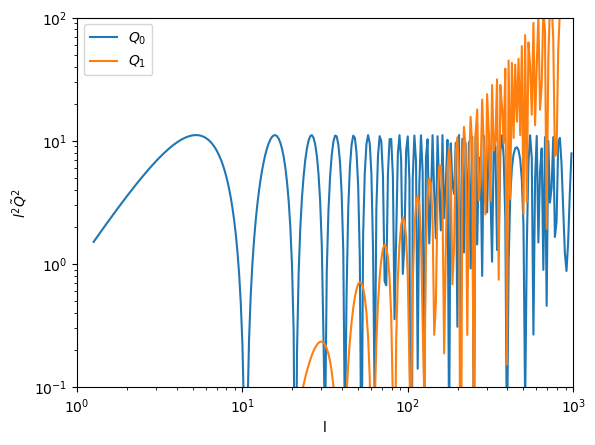

In [12]:
x=np.arange(.1,3.,.01)
l=10.**x
w=10
t=30
h=1.e3
y=w*t*l/h
q0=np.sin(y)/y
plt.plot(l,l**2*q0**2,label='$Q_0$')

## Q_1; see below
beta = w*t*l*.5/h
q1=np.sin(beta)*(.5-1/beta**2)+np.cos(beta)/beta
eps=3.14*t/(2*4.3e4)
plt.plot(l,eps*l**2*q1**2,label='$Q_1$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('l')
plt.ylabel('$l^2\\tilde Q^2$')
plt.legend()
plt.axis([1,1000,.1,100])

Now rewrite $Q_1$ by defining a dummy variable $x\equiv wtl_y/h$. Then, the limits becomes $\pm w\tau l_y/2h$ and there is a prefactor $[h/(wl_y)]^2$, so 
$$
\tilde Q_1(\vec l) = \frac{\pi \tau}{2T_c}\frac1{\beta^2}\,\int_{-\beta}^\beta dx \,x\,e^{-ix} $$
where $\beta\equiv w\tau l_y/2h$.
The claim is that the integral is
$$\sin(\beta)\left(\frac12-\frac1{\beta^2}\right)+\cos(\beta)/\beta. $$